[<< voltar ao site](covid-19-bacia-do-jacuipe.html)

In [1]:
import pandas as pd
import numpy as np
import re, os
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython import display
import datetime
from matplotlib.dates import DateFormatter

In [2]:
# Definição dos caminhos
p = 'cases-covid19-bahia.csv'
path_to_write_charts = "charts/"

# Fonte do shapefile: https://mapas.ibge.gov.br/bases-e-referenciais/bases-cartograficas/malhas-digitais
p_shapefile = 'shapefile_municipios_baciadojacuipe'

# Data atual
today = datetime.datetime.now().strftime("%d-%m-%Y")

# Lendo bases
df = pd.read_csv(p)
df_shape = gpd.read_file(p_shapefile)

# Criando caminhos
if not os.path.exists(path_to_write_charts): os.mkdir(path_to_write_charts)

In [3]:
dic_cities = {
    '^[^A-Z]*BAIXA GRANDE[^A-Z]*$': 'Baixa Grande',
    '^[^A-Z]*CAPELA DO ALTO ALEGRE[^A-Z]*$': 'Capela do Alto Alegre',
    '^[^A-Z]*CAPIM GROSSO[^A-Z]*$': 'Capim Grosso',
    '^[^A-Z]*GAVIÃO[^A-Z]*$': 'Gavião',
    '^[^A-Z]*GAVIAO[^A-Z]*$': 'Gavião',
    '^[^A-Z]*IPIRÁ[^A-Z]*$': 'Ipirá',
    '^[^A-Z]*IPIRA[^A-Z]*$': 'Ipirá',
    '^[^A-Z]*MAIRI[^A-Z]*$': 'Mairi',
    '^[^A-Z]*NOVA FÁTIMA[^A-Z]*$': 'Nova Fátima',
    '^[^A-Z]*NOVA FATIMA[^A-Z]*$': 'Nova Fátima',
    '^[^A-Z]*PÉ DE SERRA[^A-Z]*$': 'Pé de Serra',
    '^[^A-Z]*PE DE SERRA[^A-Z]*$': 'Pé de Serra',
    '^[^A-Z]*PINTADAS[^A-Z]*$': 'Pintadas',
    '^[^A-Z]*QUIXABEIRA[^A-Z]*$': 'Quixabeira',
    '^[^A-Z]*RIACHÃO DO JACUÍPE[^A-Z]*$': 'Riachão do Jacuípe',
    '^[^A-Z]*RIACHAO DO JACUIPE[^A-Z]*$': 'Riachão do Jacuípe',
    '^[^A-Z]*SÃO JOSÉ DO JACUÍPE[^A-Z]*$': 'São José do Jacuípe',
    '^[^A-Z]*SAO JOSE DO JACUIPE[^A-Z]*$': 'São José do Jacuípe',
    '^[^A-Z]*SERRA PRETA[^A-Z]*$': 'Serra Preta',
    '^[^A-Z]*VÁRZEA DA ROÇA[^A-Z]*$': 'Várzea da Roça',
    '^[^A-Z]*VARZEA DA ROCA[^A-Z]*$': 'Várzea da Roça',
    '^[^A-Z]*VÁRZEA DO POÇO[^A-Z]*$': 'Várzea do Poço',
    '^[^A-Z]*VARZEA DO POCO[^A-Z]*$': 'Várzea do Poço'
}

def filter_bj(df, city_column):
    global dic_cities
    cidades_bacia_do_jacuipe = list(dic_cities.keys())
    
    df_bacia_jacuipe = df[df[city_column].str.upper().str.contains("|".join(cidades_bacia_do_jacuipe))]
    
    for city_name in dic_cities.keys():
        df_bacia_jacuipe[city_column] = df_bacia_jacuipe[city_column].str.replace(city_name, dic_cities[city_name], regex=True)
    return df_bacia_jacuipe

df_bj = filter_bj(df, 'municipio')

/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
for city in df_bj['municipio'].unique():
    df_city = df_bj[df_bj.municipio == city]
    pop_city = df_city['populacao'].max()
    df_bj.loc[df_city.index, 'populacao'] = pop_city
df_bj['populacao'] = df_bj['populacao'].apply(lambda x: int(x))

/home/genicleito/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Visualização dos dados dos boletins da SESAB para os casos de COVID-19 no Território de Identidade Bacia do Jacuípe - BA

In [5]:
print("Dados atualizados em {}".format(datetime.datetime.now().strftime('%d-%m-%Y às %H:%M')))

Dados atualizados em 27-07-2020 às 17:50


Este documento tem o objetivo de analisar e apresentar de forma intuitiva os dados extraídos dos boletins diários da **SESAB** (Secretaria de Saúde da Bahia), garantindo o máximo de transparência nos dados sem nenhum tipo de viés nessa análise.

A extração desses dados é feita de forma automática e por isso, em alguns momentos, precisam ser confrontados com os dados diários dos boletins. As tabelas dos boletins são transformadas em bases de dados que são pré-processadas (limpeza, criação de atributos, etc) para serem então utilizadas na geração das visualizações dessa página.

## Sumário
* [Informações sobre os municípios da Bacia do Jacuípe](#1.-Informa%C3%A7%C3%B5es-Gerais)
* [Dados sobre a COVID-19 no território](#2.-Dados-sobre-a-COVID-19-confirmados-pela-SESAB-para-a-Bacia-do-Jacu%C3%ADpe)
 * [Distribuição dos casos de COVID-19 no território](#2.1-Distribui%C3%A7%C3%A3o-dos-casos-de-COVID-19)
 * [Novos casos registrados no último boletim da SESAB](#2.2-Novos-casos-registrados-no-atual-boletim-da-SESAB)
 * [Distribuição geográfica da COVID-19 no território](#2.3-Dados-geogr%C3%A1ficos-da-COVID-19-no-territ%C3%B3rio)
* [Dados históricos da COVID-19 na Bacia do Jacuípe](#3.-Dados-hist%C3%B3ricos-da-COVID-19-na-Bacia-do-Jacu%C3%ADpe)
* [Dados históricos da COVID-19 por cidade](#4.-Dados-hist%C3%B3ricos-da-COVID-19-por-cidade)

## 1. Informações Gerais

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

In [6]:
df_bj[['municipio', 'populacao']].groupby(by=['municipio', 'populacao']).max().sort_values(by=['populacao'], ascending=False).rename_axis(['Municípios', 'População'])

,
Municípios,População
Ipirá,59595
Riachão do Jacuípe,33436
Capim Grosso,30662
Baixa Grande,20468
Mairi,18676
Serra Preta,14878
Várzea da Roça,14104
Pé de Serra,13578
Capela do Alto Alegre,11637


**Fonte**: Boletim COVID-19 SESAB

In [7]:
df_bj_today = df_bj[df_bj['date'] == df_bj['date'].max()]
df_bj_today = df_bj_today.where(df_bj_today.notna(), 0)

## 2. Dados sobre a COVID-19 confirmados pela SESAB para a Bacia do Jacuípe

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

In [8]:
last_boletim = datetime.datetime.strptime(df_bj_today['date'].iloc[0], '%Y-%m-%d').strftime('%d-%m-%Y')

In [9]:
print("A Bacia do Jacuípe possui {} casos confirmados pela SESAB até a data {}".format(int(df_bj_today['total_confirmados'].sum()), last_boletim))

A Bacia do Jacuípe possui 1459 casos confirmados pela SESAB até a data 27-07-2020


### 2.1 Distribuição dos casos de COVID-19

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

In [10]:
tmp = df_bj_today.copy()
tmp['%'] = (df_bj_today.total_confirmados / df_bj_today.total_confirmados.sum() * 100)

tmp = tmp[['municipio', 'total_confirmados', '%']].round(2).sort_values(by=["%"], ascending=False)
tmp = tmp.append(pd.DataFrame({'municipio': ['TOTAL'], 'total_confirmados': [tmp['total_confirmados'].sum()], "%": [round(tmp['%'].sum(), 0)]}))
tmp.index = range(1, tmp.shape[0] + 1)
tmp['%'] = tmp['%'].apply(lambda x: str(x) + "%")
tmp['total_confirmados'] = tmp['total_confirmados'].apply(lambda x: int(x))
tmp.rename(columns={'municipio': 'Município', 'total_confirmados': 'Total de casos confirmados', '%': 'Porcentagem'})

,Município,Total de casos confirmados,Porcentagem
1,Capim Grosso,386,26.46%
2,Riachão do Jacuípe,235,16.11%
3,Ipirá,181,12.41%
4,Serra Preta,141,9.66%
5,Pintadas,106,7.27%
6,Mairi,104,7.13%
7,Capela do Alto Alegre,83,5.69%
8,Várzea da Roça,67,4.59%
9,Pé de Serra,46,3.15%
10,Nova Fátima,39,2.67%


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


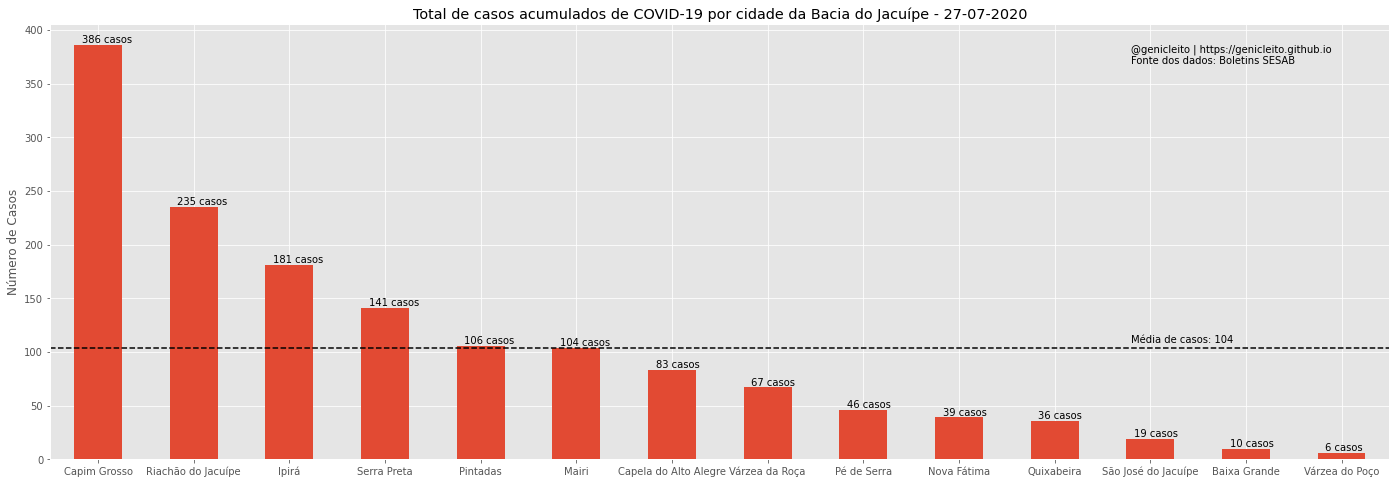

In [11]:
col = 'total_confirmados'
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(24, 8))

tmp = df_bj_today.sort_values(by=['date', col], ascending=False)[df_bj_today[col] > 0]
dt = tmp['date'].iloc[0]
tmp = tmp[tmp['date'] == dt].set_index(['municipio'])[[col]]

tmp.plot(title="Total de casos acumulados de COVID-19 por cidade da Bacia do Jacuípe - {}".format(last_boletim), ax=ax, kind='bar', legend=False, rot=0)

for i in range(tmp.shape[0]):
    ax.annotate('{} {}'.format(int(tmp[col].iloc[i]), 'caso' if tmp[col].iloc[i] == 1 else 'casos'), xy=(i - 0.17, tmp[col].iloc[i] + 2))

mean = int(round(tmp[col].mean(), 0))
ax.hlines(mean, ax.get_xlim()[0], ax.get_xlim()[1], linestyles='dashed')
ax.annotate('Média de casos: {}'.format(mean), (ax.get_xlim()[1] / 1.25, mean + 5))

ax.set_xlabel("")
ax.set_ylabel("Número de Casos")
ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Boletins SESAB', (ax.get_xlim()[1] / 1.25, ax.get_ylim()[1] / 1.1))
plt.savefig(path_to_write_charts + "total_casos_acumulados_territorio_barras.svg", format='svg', dpi=1000)
plt.show()

**Fonte**: Boletim COVID-19 SESAB

### 2.2 Novos casos registrados no atual boletim da SESAB

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


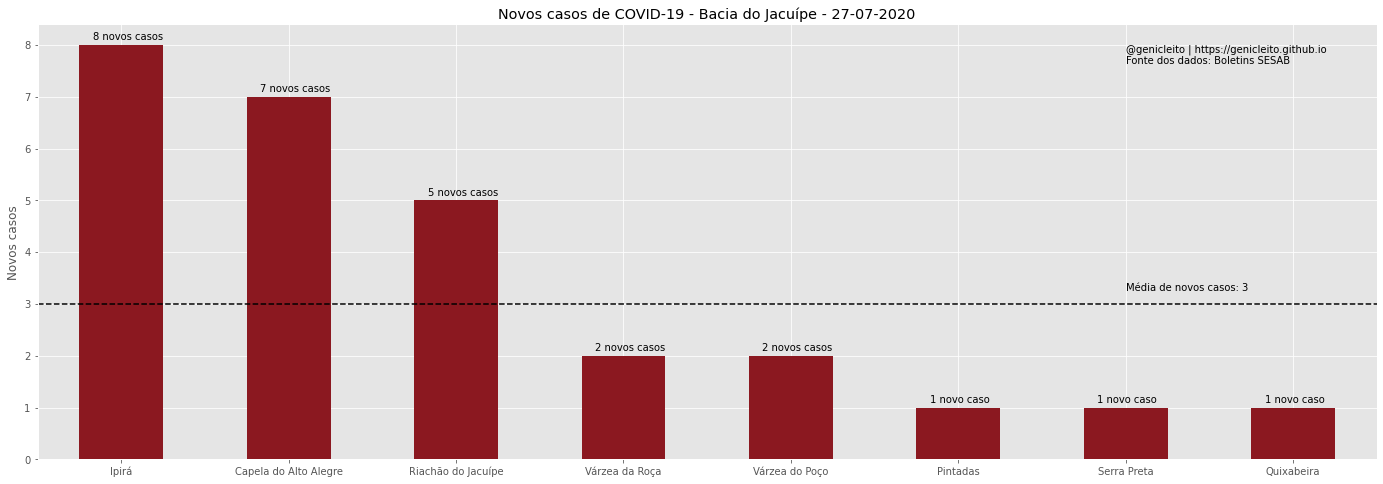

In [12]:
for col in ['novos_casos']:
    plt.style.use('ggplot')
    f, ax = plt.subplots(figsize=(24, 8))
    
    tmp = df_bj_today.sort_values(by=['date', col], ascending=False)[df_bj_today['novos_casos'] > 0]
    dt = tmp['date'].iloc[0]
    tmp = tmp[tmp['date'] == dt].set_index(['municipio'])[[col]]
    
    tmp.plot(title="Novos casos de COVID-19 - Bacia do Jacuípe - {}".format(last_boletim), ax=ax, kind='bar', legend=False, rot=0, color='#8b1820')
    
    for i in range(tmp.shape[0]):
        ax.annotate('{} {}'.format(int(tmp['novos_casos'].iloc[i]), 'novo caso' if tmp['novos_casos'].iloc[i] == 1 else 'novos casos'), xy=(i - 0.17, tmp['novos_casos'].iloc[i] + 0.1))
    
    mean = int(round(tmp['novos_casos'].mean(), 0))
    ax.hlines(mean, ax.get_xlim()[0], ax.get_xlim()[1], linestyles='dashed')
    ax.annotate('Média de novos casos: {}'.format(mean), (ax.get_xlim()[1] / 1.25, mean + 0.25))
    
    ax.set_xlabel("")
    ax.set_ylabel("Novos casos")
    ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Boletins SESAB', (ax.get_xlim()[1] / 1.25, ax.get_ylim()[1] / 1.1))
    plt.savefig(path_to_write_charts + col.replace("í", "i").replace("á", "a").replace("õ", "o").replace("é", "e").replace("ã", "a").replace("ç", "c") + ".svg", format='svg', dpi=1000)
    plt.show()

### 2.3 Dados geográficos da COVID-19 no território

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

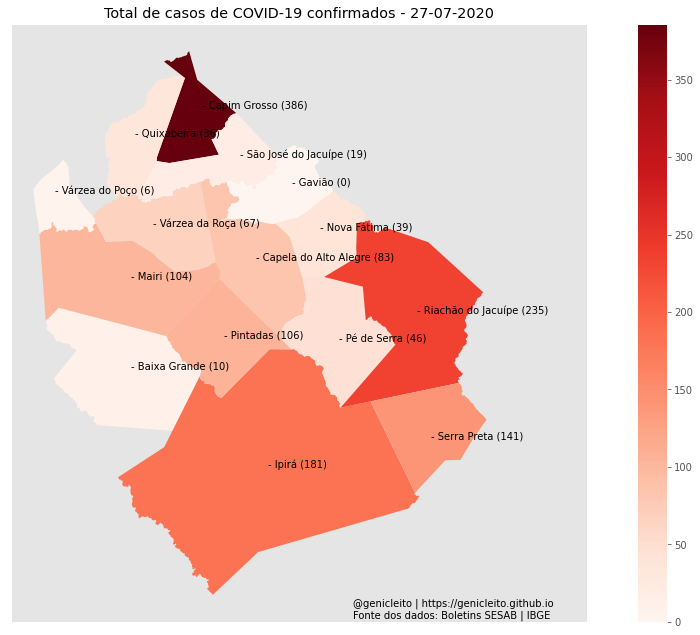

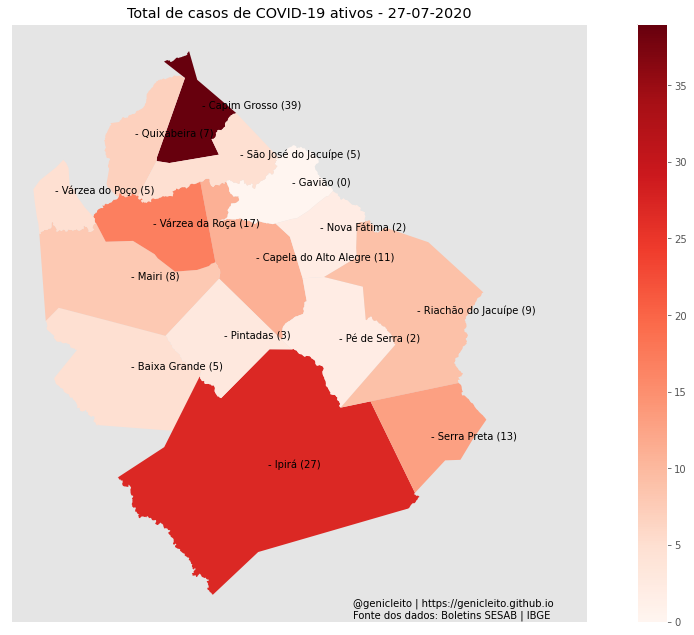

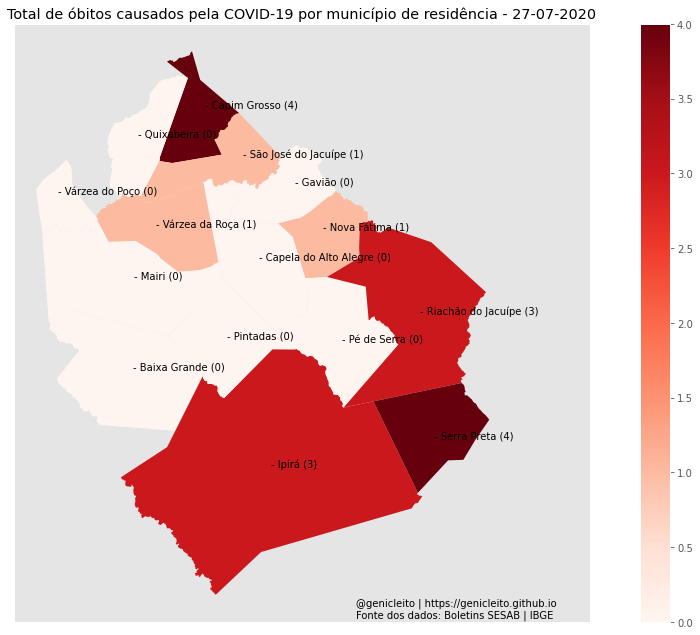

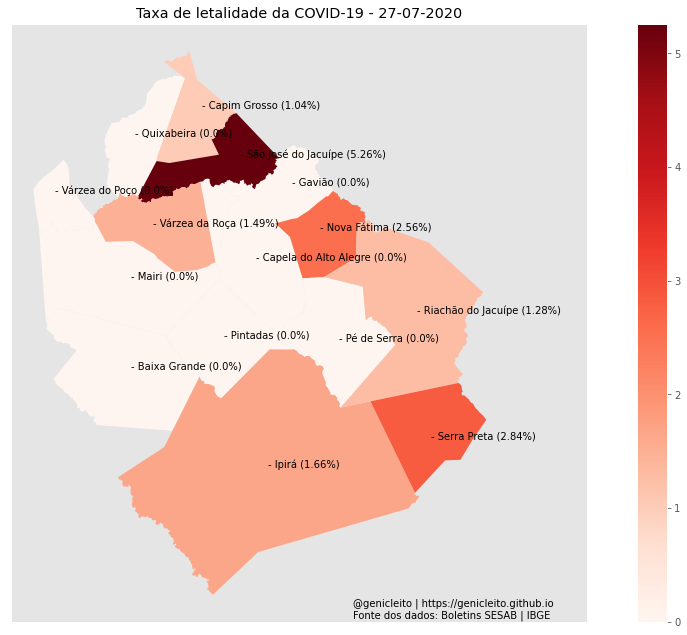

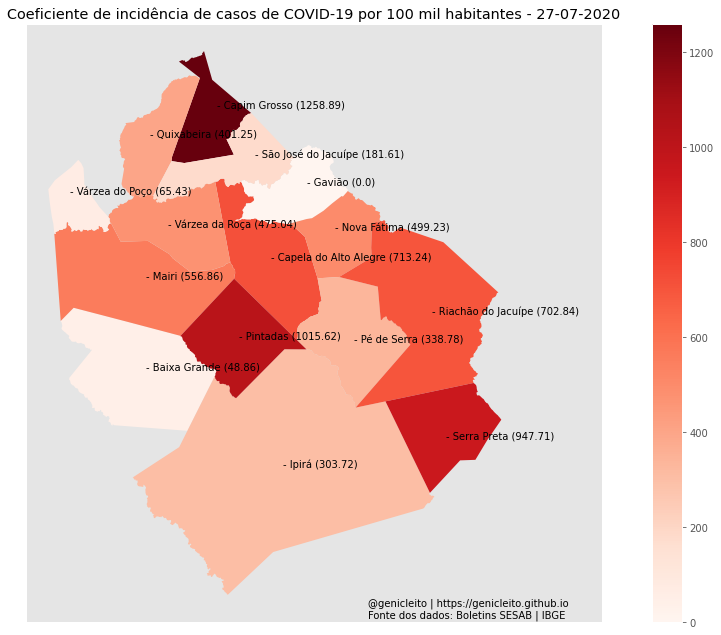

In [13]:
describe_columns = {
    'total_confirmados': 'Total de casos de COVID-19 confirmados',
    'total_ativos': 'Total de casos de COVID-19 ativos',
    'total_obitos_munres': 'Total de óbitos causados pela COVID-19 por município de residência',
    'taxa_letalidade': 'Taxa de letalidade da COVID-19',
    'coef_incidencia_100k_hab': 'Coeficiente de incidência de casos de COVID-19 por 100 mil habitantes'
}
for col in describe_columns.keys():
    f, ax = plt.subplots(figsize=(18, 11))
    
    tmp = df_shape.rename(columns={'NM_MUNICIP': 'municipio'}).merge(df_bj_today[['municipio', col]], on=['municipio'], how='left')
    tmp['coords'] = tmp['geometry'].apply(lambda x: x.representative_point().coords[0])
    tmp[col] = pd.to_numeric(tmp[col].where(tmp[col].notnull(), 0), downcast='integer')

    tmp.plot(legend=True, column=col, cmap='Reds', ax=ax)

    for i in range(tmp.shape[0]):
        ax.annotate('- {} ({}{})'.format(tmp['municipio'].iloc[i], tmp[col].iloc[i], "%" if col == 'taxa_letalidade' else ""), xy=tmp['coords'].iloc[i])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(describe_columns[col] + " - " + last_boletim)
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 0.2)
    ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Boletins SESAB | IBGE', (ax.get_xlim()[1] - 0.6, ax.get_ylim()[0] + 0.01))
    plt.savefig(path_to_write_charts + "mapa_" + col + ".svg", format='svg', dpi=1000)
    plt.plot()

O coeficiente de incidência por 100 mil habitantes mede a incidência de casos de COVID-19 para cada 100 mil habitantes (obtido pela divisão do número de casos da localidade pela população vezes 100 mil).

Esse é uma forma mais justa de comparação do número de casos dos territórios pois todos têm como referência 100 mil habitantes com relação à população real.

## 3. Dados históricos da COVID-19 na Bacia do Jacuípe

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

### 3.1 Dados históricos

In [14]:
def plot(df, city="", columns=['date', 'total_confirmados', 'total_ativos', 'total_recuperados', 'novos_casos', 'total_obitos_munres'], save_path=path_to_write_charts):
    plt.style.use('ggplot')
    dic_variables = {'total_ativos': 'Total de casos ativos', 'total_confirmados': 'Total de casos confirmados', 'novos_casos': 'Novos casos', 'total_recuperados': 'Total de recuperados', 'total_obitos_munres': 'Total de óbitos por município de residência'}
    
    f, ax = plt.subplots(figsize=(24, 10))
    tmp = df[columns]
    tmp['date'] = pd.to_datetime(tmp['date'])

    ax.plot(tmp['date'], tmp[[x for x in columns if x != 'date']], 'o', ls="-")

    colors = ['blue', 'yellow', 'green', 'orange', 'red']
    for i, l in enumerate(ax.get_lines()):
        l.set_color(colors[i])

    tmp = tmp.sort_values(by=['date'])

    ax.set_xlabel("Data")
    ax.set_ylabel("Número de casos")
    ax.legend([dic_variables[x] for x in tmp.columns[1:]])
    # ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='x')
    ax.set_title("Casos acumulados de COVID-19{} - BA - Até: {}".format(" - " + city, last_boletim))

    # Define the date format
    date_form = DateFormatter("%d-%m")
    ax.xaxis.set_major_formatter(date_form)
    plt.draw()

    p = (datetime.datetime.strptime(ax.get_xticklabels()[-1].get_text() + '-2020', "%d-%m-%Y") - tmp['date'].max()).days
    for col in tmp.columns[1:]:
        ax.annotate("  {}".format(int(tmp[col].iloc[-1])), xy=(ax.get_xticks()[-1] - p, tmp[col].iloc[-1]))
    ax.set_ylim(-5, int(df[['total_ativos', 'total_confirmados', 'novos_casos']].max().max()) + 10)
    ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Boletins SESAB', (ax.get_xlim()[0] + (ax.get_xlim()[1] - ax.get_xlim()[0])/7.5, ax.get_ylim()[1]/1.3))
    if save_path: plt.savefig(save_path + "total_casos_acumulados_" + city.lower().replace(" ", "_").replace("í", "i").replace("á", "a").replace("õ", "o").replace("é", "e").replace("ã", "a").replace("ç", "c") + ".svg", format='svg', dpi=1000)
    plt.show()
    

In [15]:
columns_to_describe = ['total_confirmados', 'total_ativos', 'total_recuperados', 'total_obitos_munres', 'novos_casos']

Gráfico com os dados históricos de COVID-19 da Bacia do Jacuípe

/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


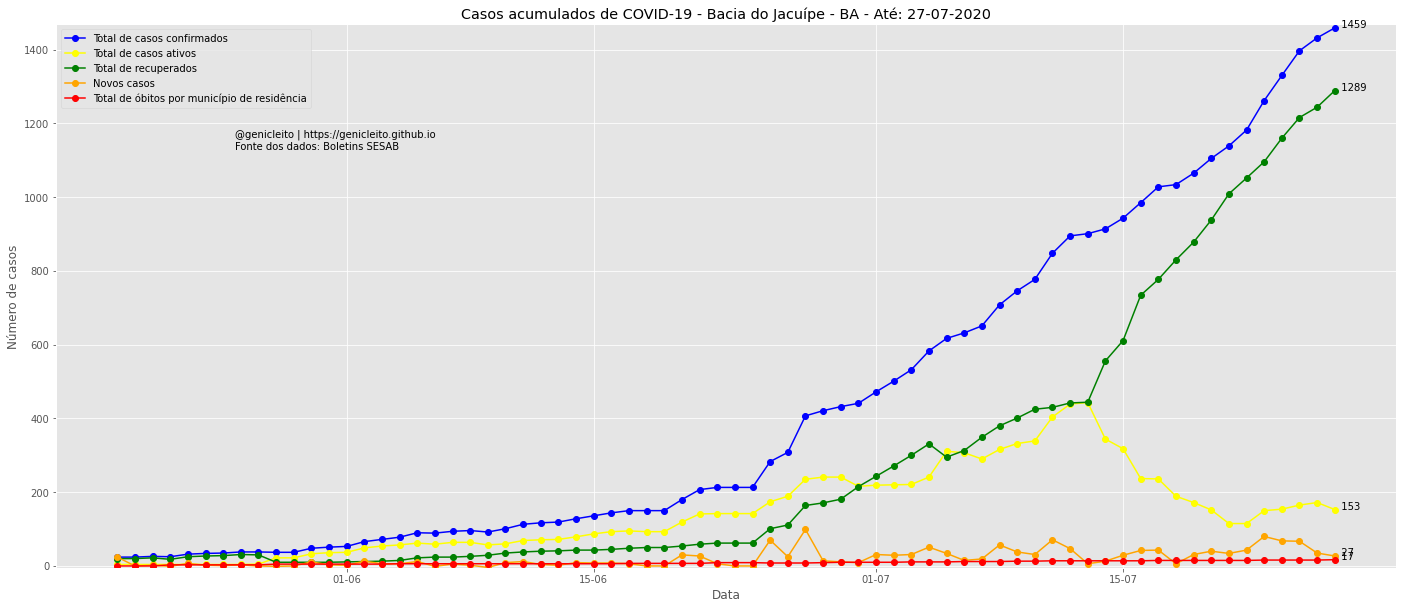

In [16]:
df_bj_grouped = df_bj[['date'] + columns_to_describe + ['novos_obitos']].groupby(by=['date']).sum().reset_index()
plot(df_bj_grouped, city='Bacia do Jacuípe')

Tabela com medidas dos dados históricos de COVID-19 da Bacia do Jacuípe

In [17]:
tmp = df_bj_grouped.rename(columns={'total_confirmados': 'Confirmados', 'total_ativos': 'Casos ativos', 'total_recuperados': 'Recuperados', 'novos_casos': 'Novos Casos', 'novos_obitos': 'Novos óbitos', 'total_obitos_munres': 'Óbitos por município de residência'})
tmp.describe().loc[['50%', 'max'], :].rename(index={'50%': 'Mediana', 'max': "Máximo"}).astype(int)

,Confirmados,Casos ativos,Recuperados,Óbitos por município de residência,Novos Casos,Novos óbitos
Mediana,213,130,62,8,11,0
Máximo,1459,443,1289,17,99,3


In [18]:
print("")

Situação atual do número de casos de coronavírus

In [19]:
tmp = df_bj_grouped.rename(columns={'total_confirmados': 'Confirmados', 'total_ativos': 'Casos ativos', 'total_recuperados': 'Recuperados', 'novos_casos': 'Novos Casos', 'novos_obitos': 'Novos óbitos', 'total_obitos_munres': 'Óbitos por município de residência'})
tmp = tmp[tmp['date'] == tmp['date'].max()][tmp.columns[1:]].T.astype(int)
tmp.rename(columns={tmp.columns[0]: 'Situação da COVID-19 na Bacia do Jacuípe na data {}'.format(last_boletim)})

,Situação da COVID-19 na Bacia do Jacuípe na data 27-07-2020
Confirmados,1459
Casos ativos,153
Recuperados,1289
Óbitos por município de residência,17
Novos Casos,27
Novos óbitos,1


### 3.2 Informações dos dados acumulados por cidade

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

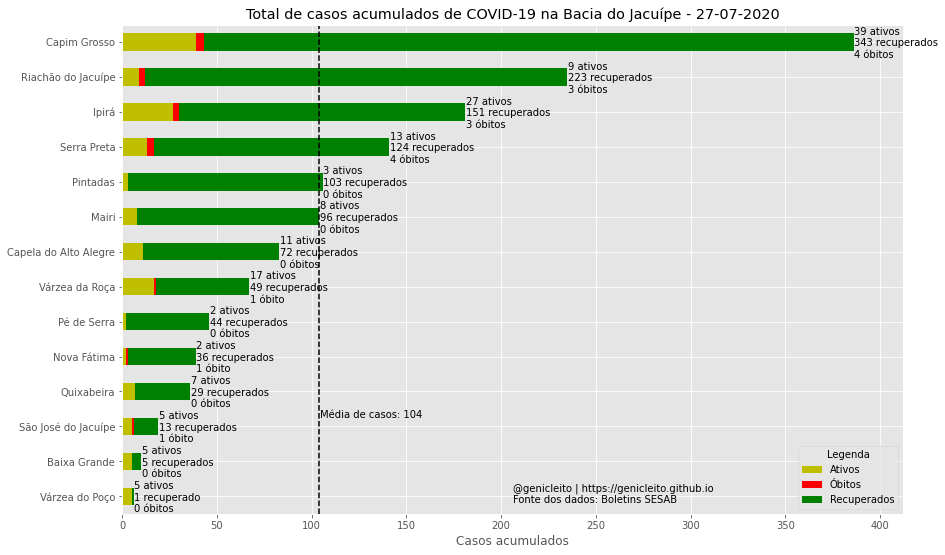

In [20]:
dic = {'total_confirmados': 'Ativos', 'total_obitos_munres': 'Óbitos', 'total_recuperados': 'Recuperados'}

tmp = df_bj_today.where(df_bj_today.notna(), 0).sort_values(by=['total_confirmados'])
mean = int(round(tmp['total_confirmados'].mean(), 0))
tmp['municipio'] = tmp['municipio'].str.replace("\/[A-Z]+$", '')
tmp = tmp[['municipio', 'total_confirmados', 'total_obitos_munres', 'total_recuperados', 'total_ativos']].set_index('municipio')
tmp['total_confirmados'] = tmp['total_confirmados'] - tmp['total_obitos_munres'] - tmp['total_recuperados']

ativos = tmp['total_ativos']
tmp = tmp.drop('total_ativos', axis=1)

plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(14, 9))

tmp.plot(title="Total de casos acumulados de COVID-19 na Bacia do Jacuípe - {}".format(last_boletim), ax=ax, kind='barh', color=['y', 'r', 'g'], stacked=True)

tmp['total_confirmados'] = tmp['total_confirmados'] + tmp['total_obitos_munres'] + tmp['total_recuperados']

ax.legend([dic[x] for x in tmp.columns], title="Legenda")

ax.vlines(mean, ax.get_ylim()[0], ax.get_ylim()[1], linestyles='dashed')
ax.annotate('Média de casos: {}'.format(mean), (mean + 0.5, ax.get_ylim()[1] / 6))

xy = [(tmp['total_obitos_munres'].iloc[i], tmp['total_confirmados'].iloc[i], tmp['total_recuperados'].iloc[i], ativos.iloc[i]) for i in range(tmp.shape[0])]
for i, x in enumerate(xy):
    ax.annotate("{} {}\n{} {}\n{} {}".format(int(x[3]), "ativos" if x[3] != 1 else "ativo", int(x[2]), "recuperados" if x[2] != 1 else "recuperado", int(x[0]), "óbitos" if x[0] != 1 else "óbito"), xy=(x[1] + 0.2, i - 0.45))

ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 7)
ax.set_ylabel("")
ax.set_xlabel("Casos acumulados")
ax.annotate('@genicleito | https://genicleito.github.io\nFonte dos dados: Boletins SESAB', (ax.get_xlim()[1] / 2, - .2))

plt.savefig(path_to_write_charts + "compilado_casos_cidades_barh.svg", format='svg', dpi=1000)
plt.show()

## 4. Dados históricos da COVID-19 por cidade

[Topo da página](#Visualiza%C3%A7%C3%A3o-dos-dados-dos-boletins-da-SESAB-para-os-casos-de-COVID-19-no-Territ%C3%B3rio-de-Identidade-Bacia-do-Jacu%C3%ADpe---BA)

Abaixo são exibidos os dados históricos agregados (acumulados ao longo do tempo, a partir da data 19-05-2020 até a data atual) dos municípios que compõem a Bacia do Jacuípe. Para as datas em que não foi possível extrair os dados do boletim da SESAB (por inconsistência do arquivo ou algo do tipo) foram repetidos os dados da data anterior.

Abaixo dos gráficos, para cada município, há uma tabela com os valores de **mediana** e **máximo** para os `novos casos`, `casos confirmados`, `casos ativos`, `casos recuperados`, `óbitos por município de residência` e `novos óbitos`.



Dados históricos da COVID-19 no município de Baixa Grande


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


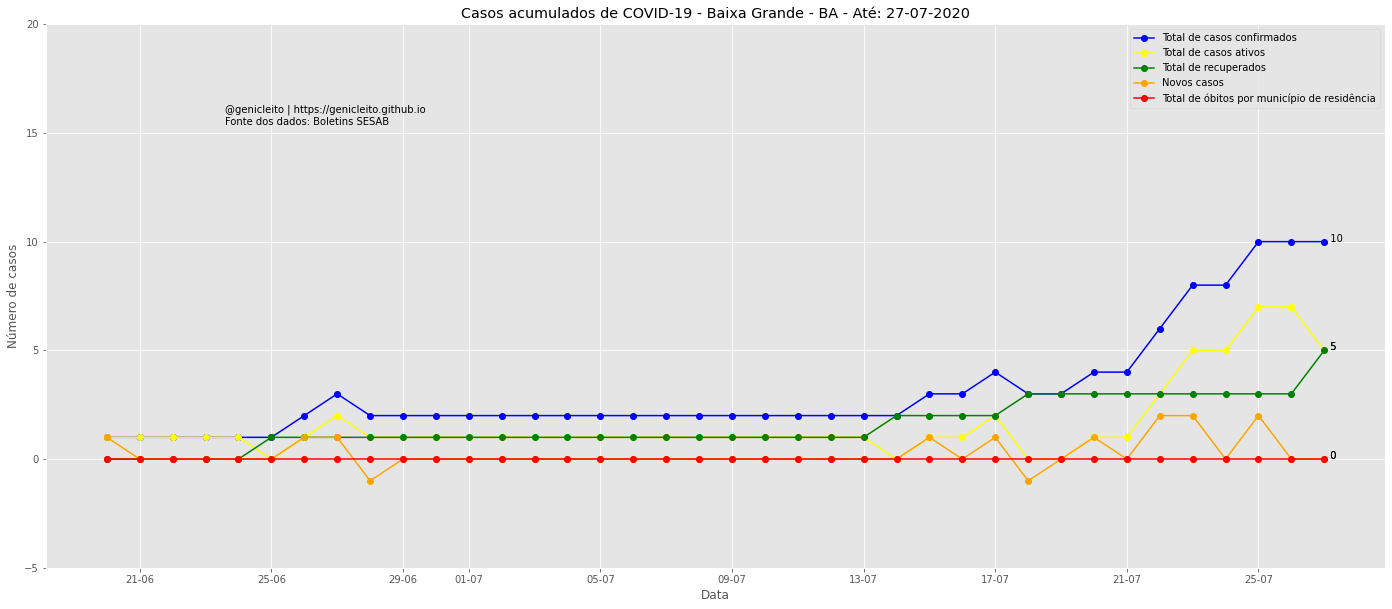



Tabela com medidas dos dados históricos da COVID-19 em Baixa Grande


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,2,1,1,0,0
Máximo,10,7,5,0,2








Dados históricos da COVID-19 no município de Capela do Alto Alegre


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


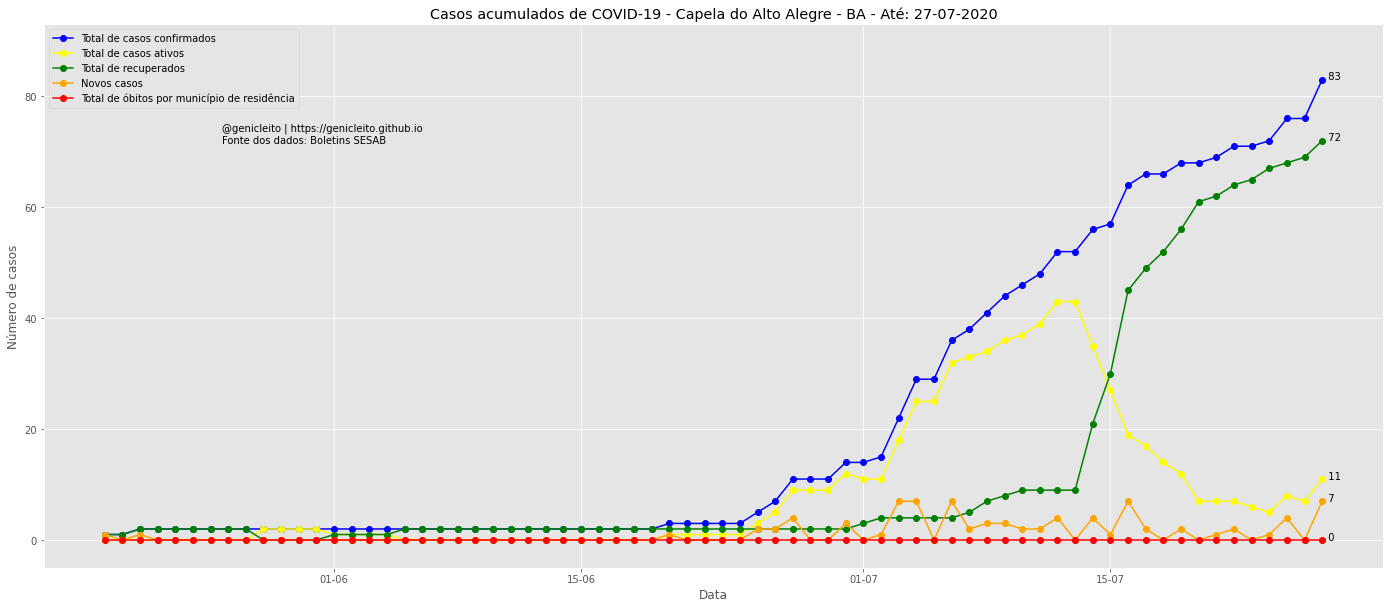



Tabela com medidas dos dados históricos da COVID-19 em Capela do Alto Alegre


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,3,2,2,0,0
Máximo,83,43,72,0,7








Dados históricos da COVID-19 no município de Capim Grosso


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


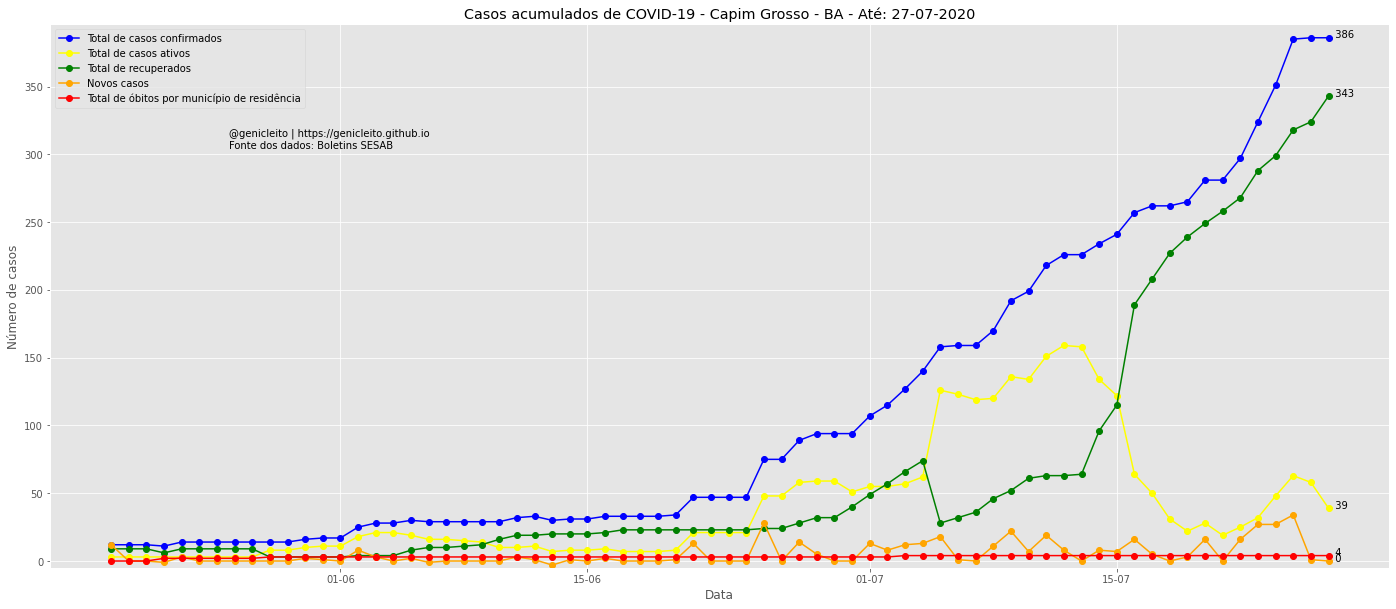



Tabela com medidas dos dados históricos da COVID-19 em Capim Grosso


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,47,21,23,3,1
Máximo,386,159,343,4,34








Dados históricos da COVID-19 no município de Ipirá


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


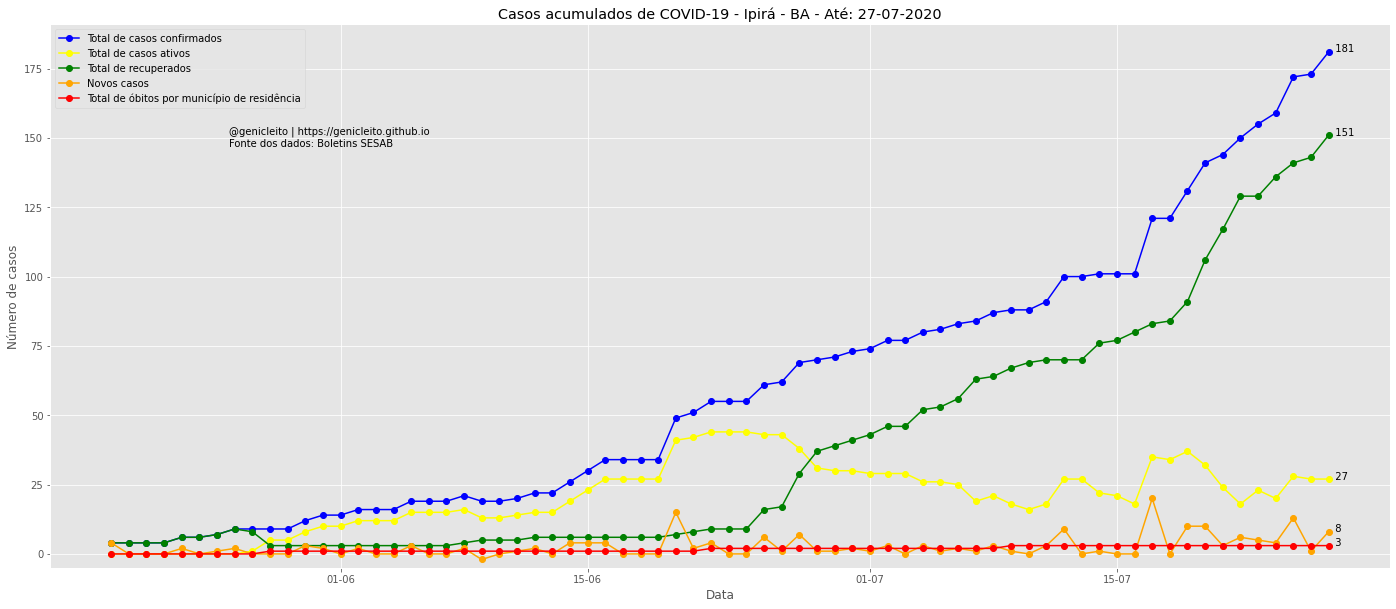



Tabela com medidas dos dados históricos da COVID-19 em Ipirá


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,55,21,9,2,1
Máximo,181,44,151,3,20








Dados históricos da COVID-19 no município de Mairi


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


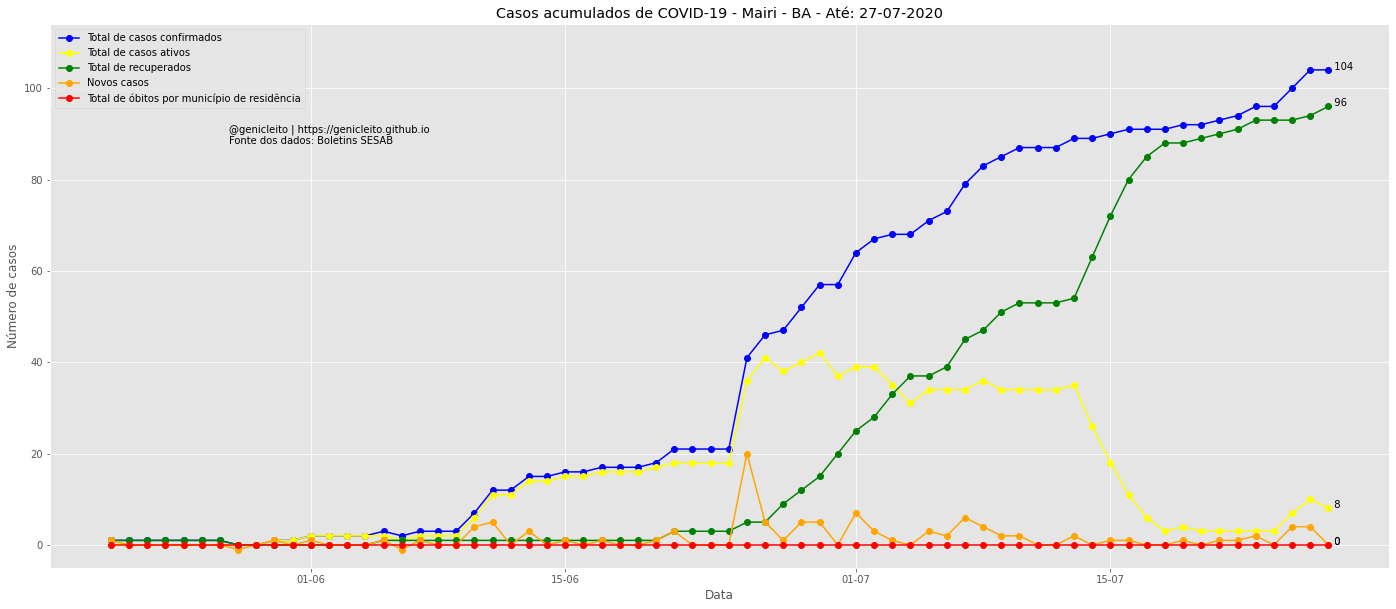



Tabela com medidas dos dados históricos da COVID-19 em Mairi


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,21,11,3,0,1
Máximo,104,42,96,0,20








Dados históricos da COVID-19 no município de Nova Fátima


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


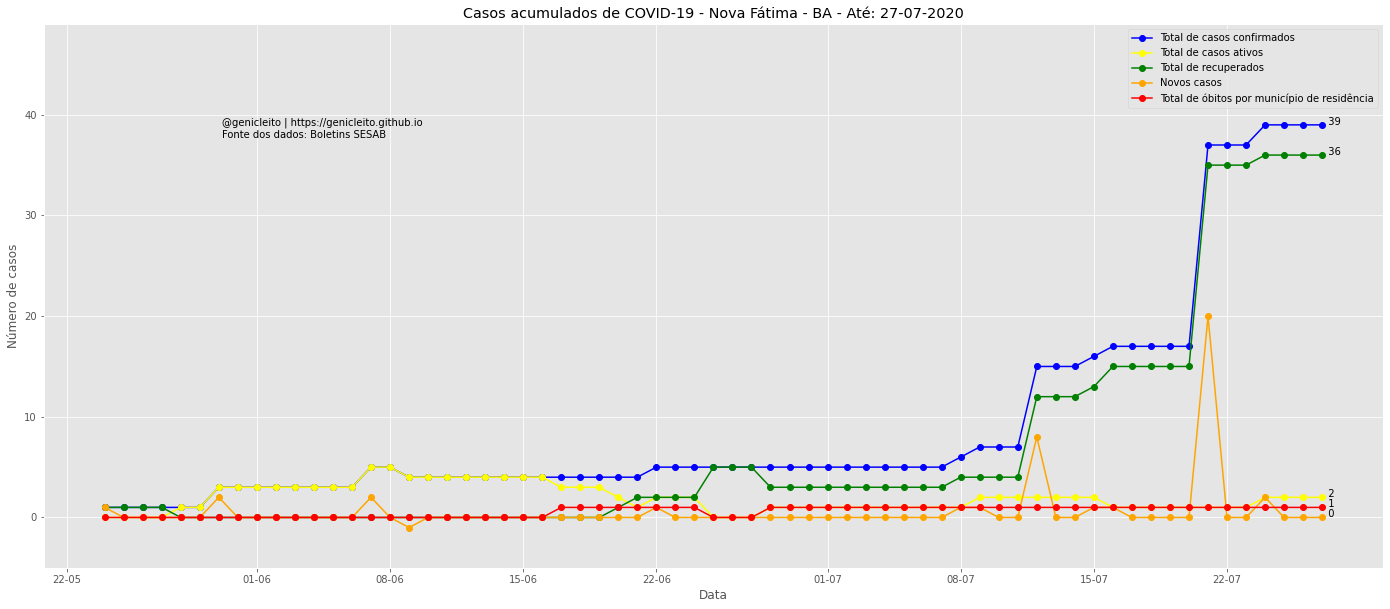



Tabela com medidas dos dados históricos da COVID-19 em Nova Fátima


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,5,2,3,1,0
Máximo,39,5,36,1,20








Dados históricos da COVID-19 no município de Pintadas


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


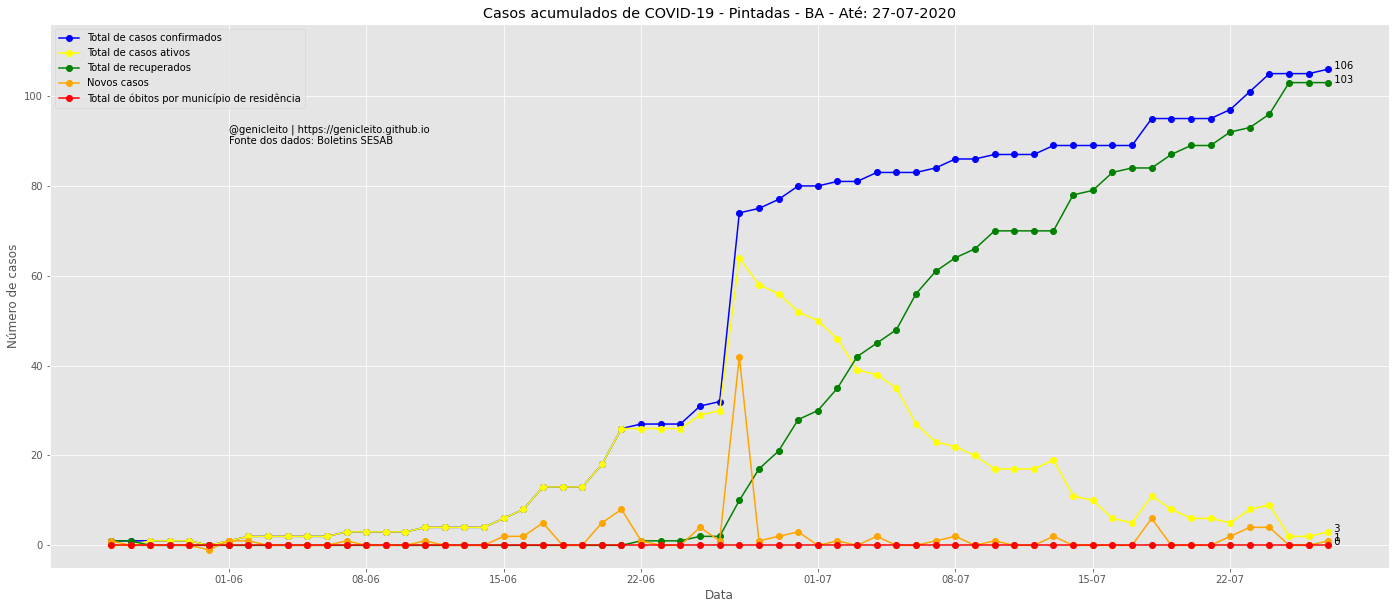



Tabela com medidas dos dados históricos da COVID-19 em Pintadas


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,32,8,2,0,0
Máximo,106,64,103,0,42








Dados históricos da COVID-19 no município de Pé de Serra


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


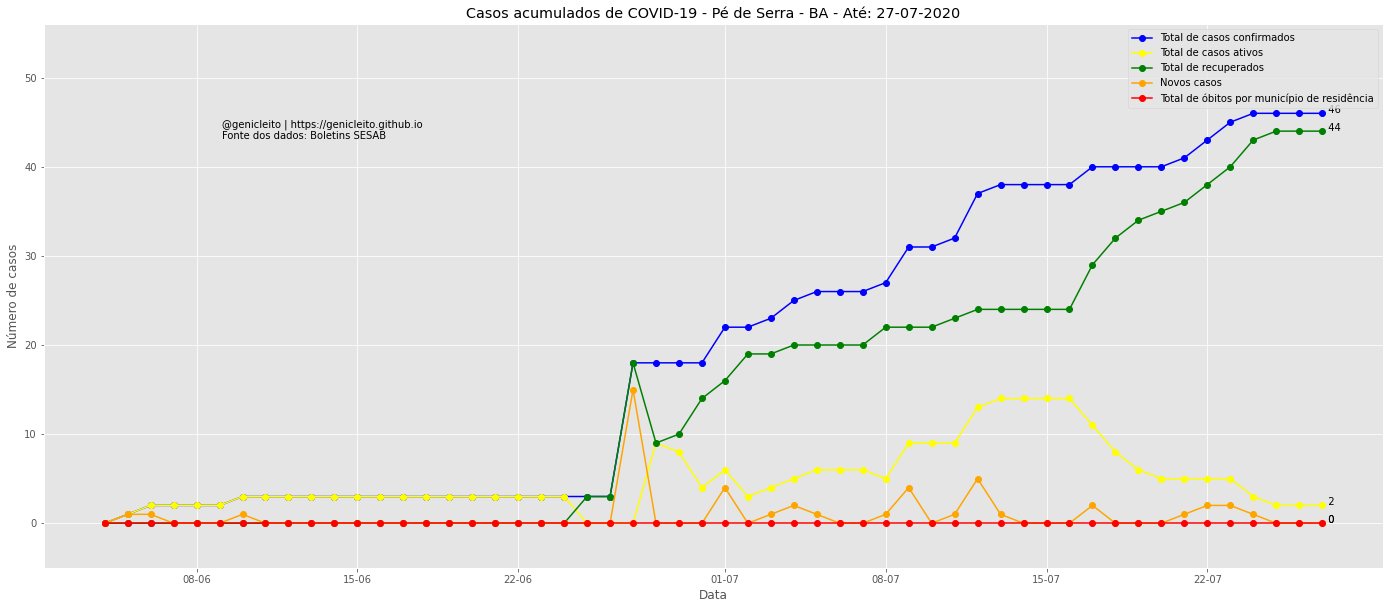



Tabela com medidas dos dados históricos da COVID-19 em Pé de Serra


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,20,3,17,0,0
Máximo,46,14,44,0,15








Dados históricos da COVID-19 no município de Quixabeira


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


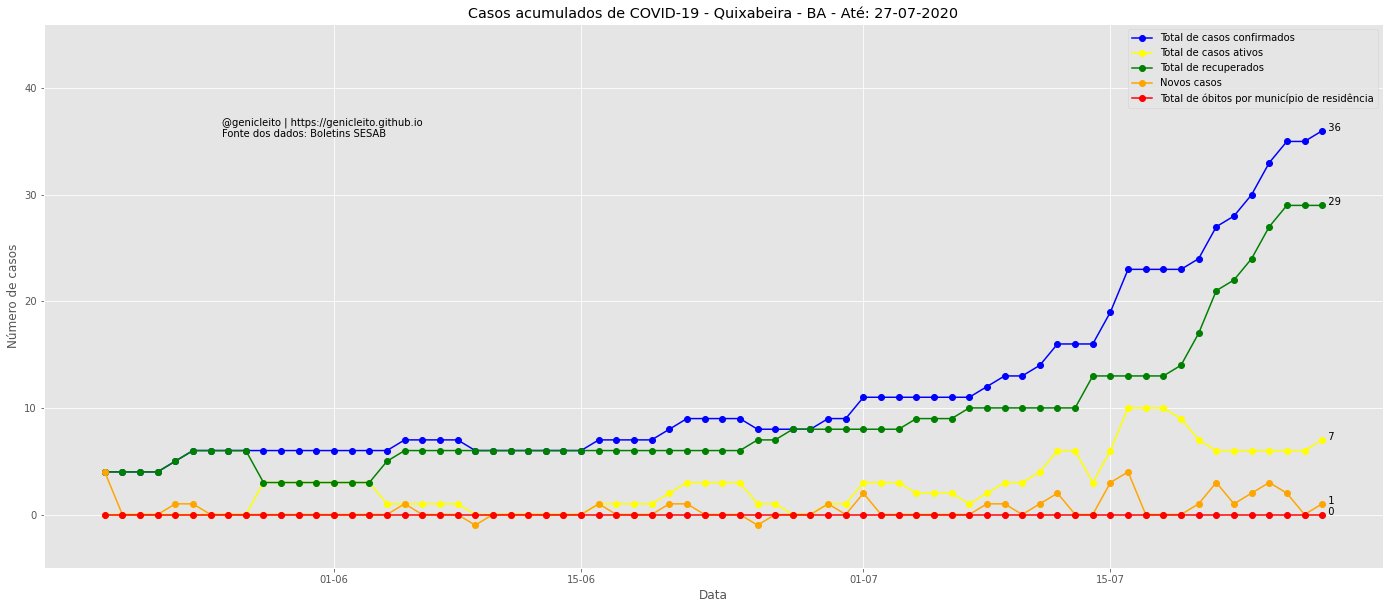



Tabela com medidas dos dados históricos da COVID-19 em Quixabeira


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,8,2,6,0,0
Máximo,36,10,29,0,4








Dados históricos da COVID-19 no município de Riachão do Jacuípe


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


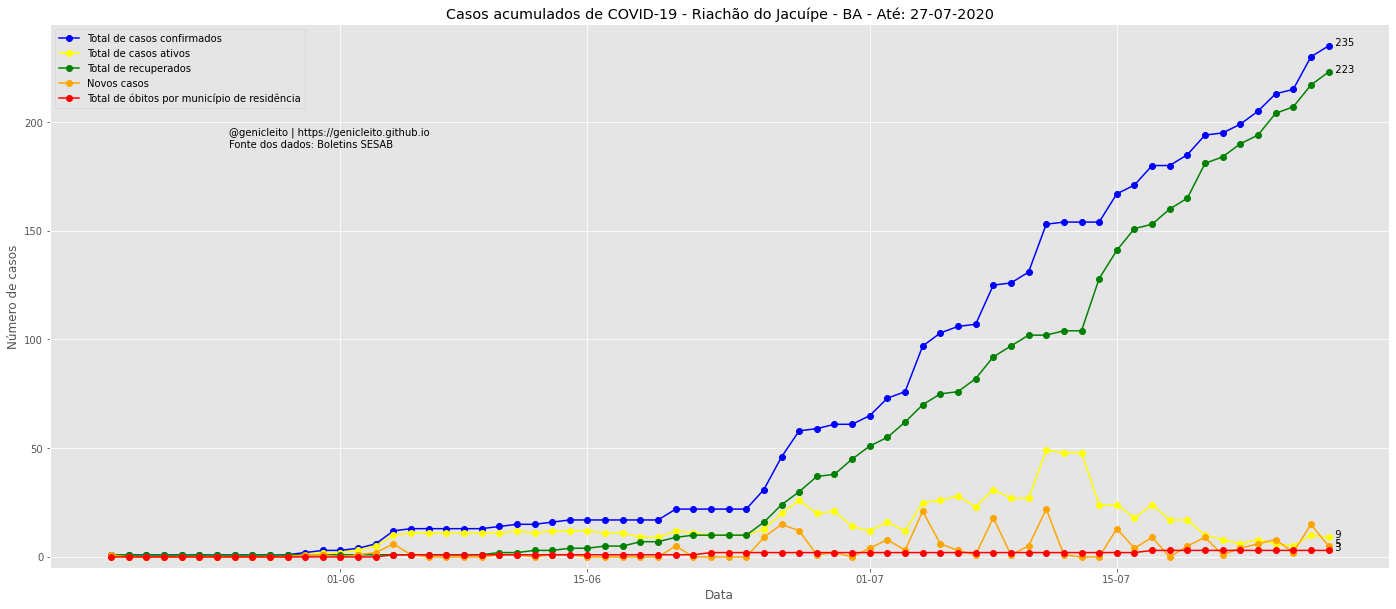



Tabela com medidas dos dados históricos da COVID-19 em Riachão do Jacuípe


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,22,11,10,2,1
Máximo,235,49,223,3,22








Dados históricos da COVID-19 no município de Serra Preta


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


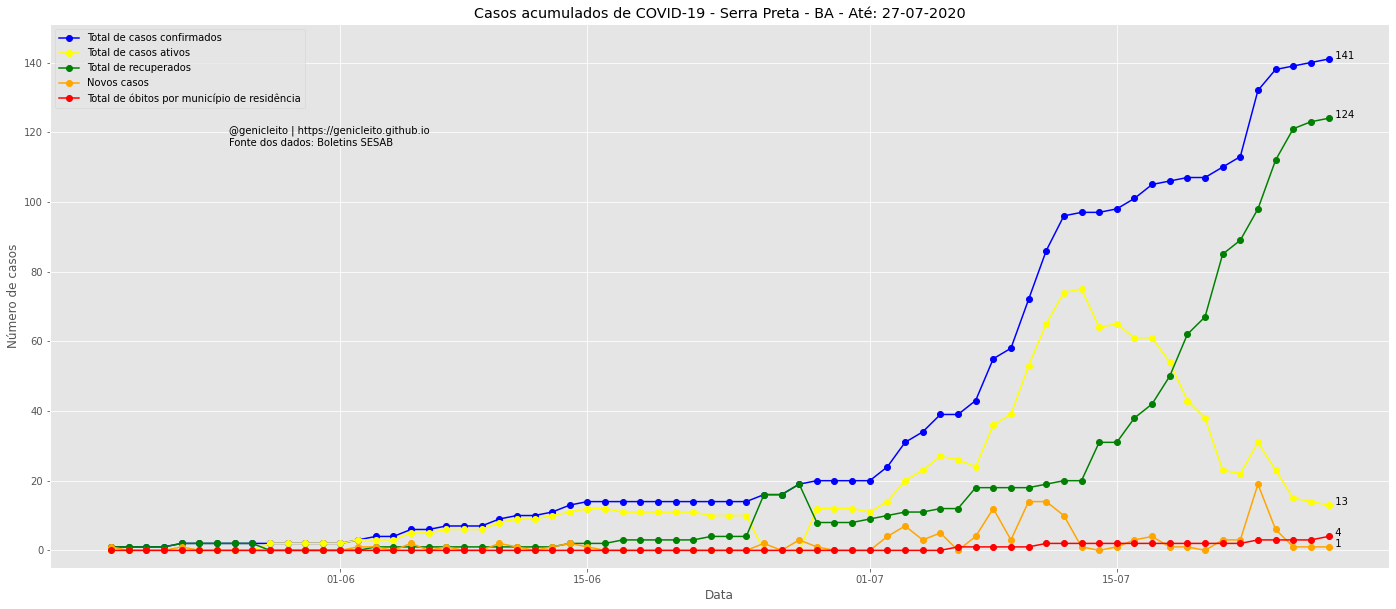



Tabela com medidas dos dados históricos da COVID-19 em Serra Preta


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,14,11,4,0,1
Máximo,141,75,124,4,19








Dados históricos da COVID-19 no município de São José do Jacuípe


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


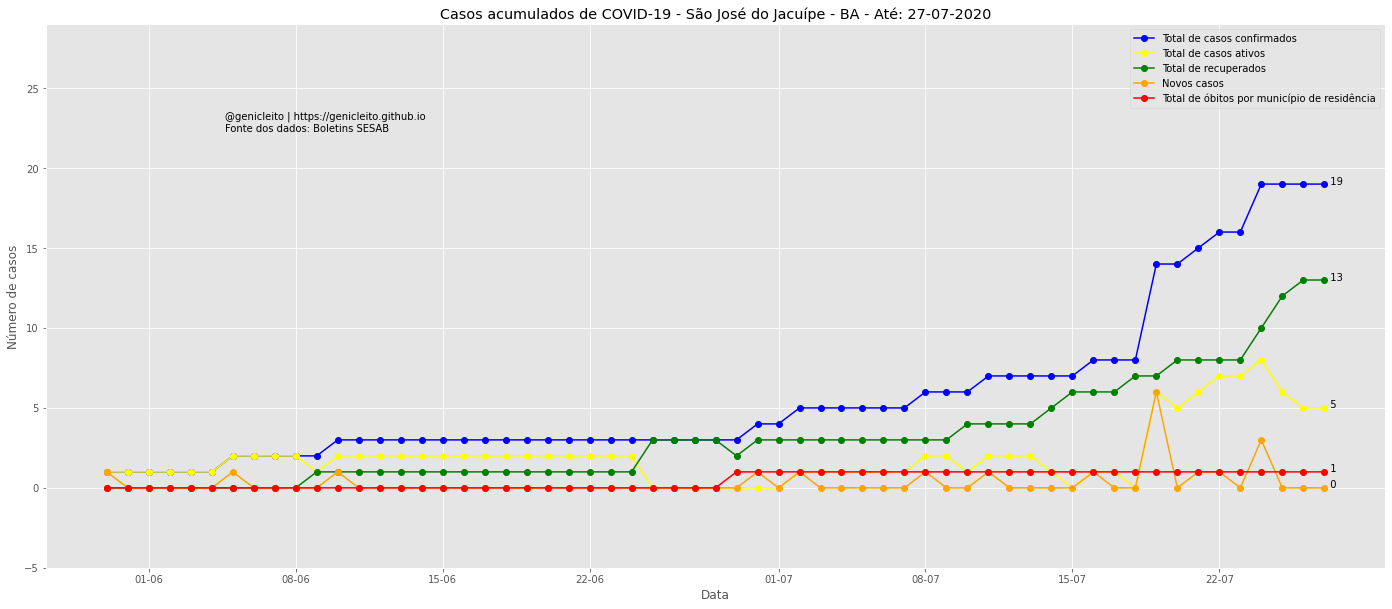



Tabela com medidas dos dados históricos da COVID-19 em São José do Jacuípe


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,3,2,3,0,0
Máximo,19,8,13,1,6








Dados históricos da COVID-19 no município de Várzea da Roça


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


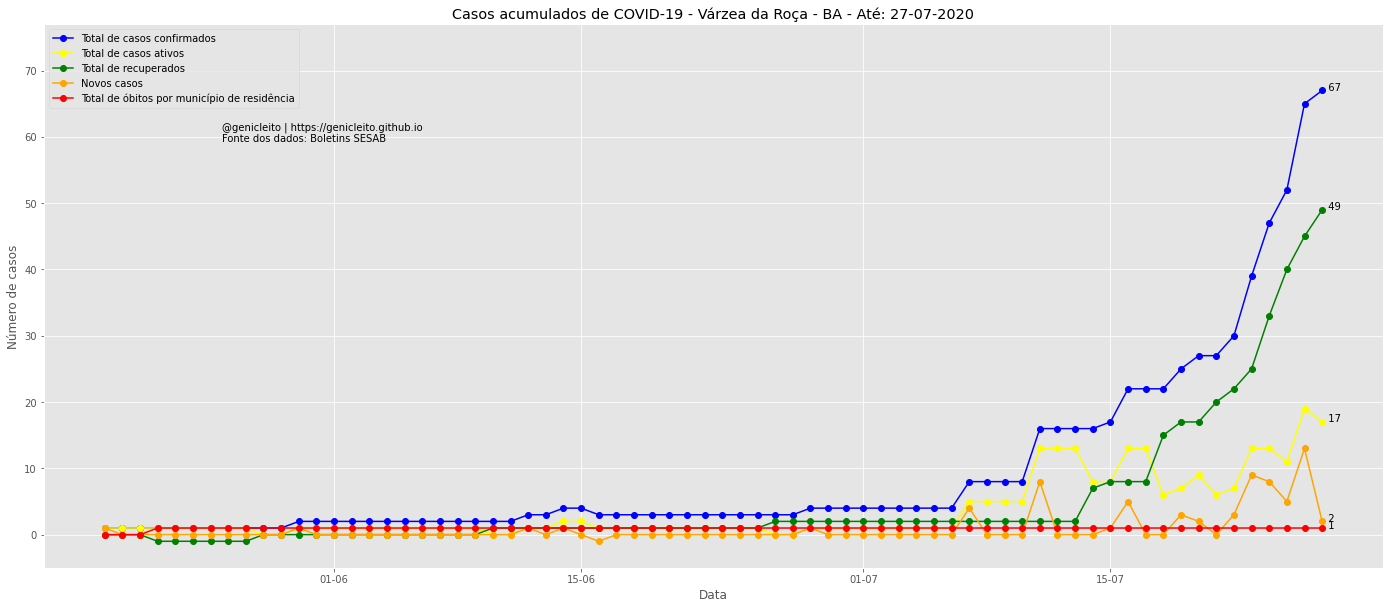



Tabela com medidas dos dados históricos da COVID-19 em Várzea da Roça


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,3,1,1,1,0
Máximo,67,19,49,1,13








Dados históricos da COVID-19 no município de Várzea do Poço


/home/genicleito/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


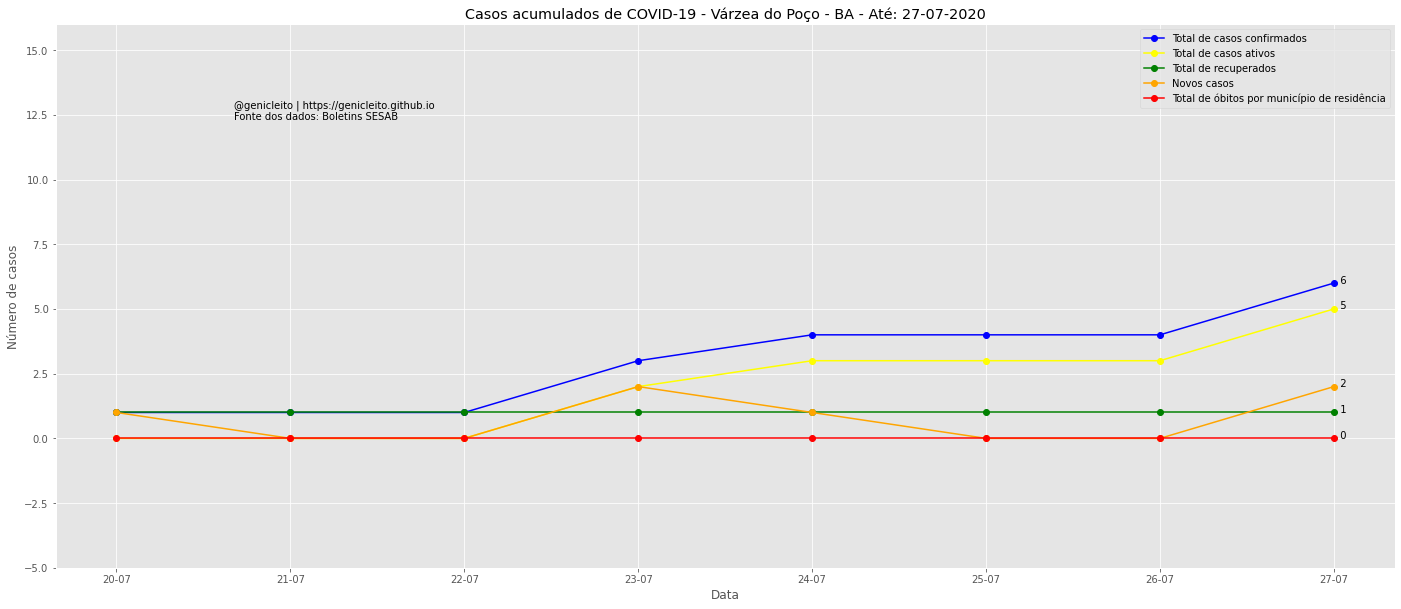



Tabela com medidas dos dados históricos da COVID-19 em Várzea do Poço


,Confirmados,Casos ativos,Recuperados,Óbito por município de residência,Novos casos
Mediana,3,2,1,0,0
Máximo,6,5,1,0,2


In [21]:
for city in df_bj['municipio'].sort_values().unique():
    tmp = df_bj[df_bj['municipio'] == city]
    print("\n\nDados históricos da COVID-19 no município de {}".format(city))
    plot(tmp, city=city)
    print("\n\nTabela com medidas dos dados históricos da COVID-19 em {}".format(city))
    display.display(tmp[columns_to_describe].describe().loc[['50%', 'max'], :].rename(index={'50%': 'Mediana', 'max': "Máximo"}, columns={'total_confirmados': 'Confirmados', 'total_ativos': 'Casos ativos', 'total_recuperados': 'Recuperados', 'novos_casos': 'Novos casos', 'total_obitos_munres': 'Óbito por município de residência'}).astype(int))
    print("\n\n\n")

### Fontes consultadas
* **SESAB** - Notas Técnicas e Boletins Epidemiológicos – Covid-19: http://www.saude.ba.gov.br/temasdesaude/coronavirus/notas-tecnicas-e-boletins-epidemiologicos-covid-19/
* **IBGE** - Bases Cartográficas - Malhas digitais: https://mapas.ibge.gov.br/bases-e-referenciais/bases-cartograficas/malhas-digitais

Documento produzido por **Genicleito Gonçalves**

Caso identifique alguma inconsistência enviar email para: genicleito@live.com

Redes sociais:
* Site: https://genicleito.github.io
* Instagram: https://www.instagram.com/genicleito/
* Twitter: https://twitter.com/genicleito
* Facebook: https://fb.com/genicleito
* GitHub: https://github.com/genicleito